In [5]:
import os
base_dir = 'C:\\Users\Ben\Documents\GitHub\expression_broad_data'
os.chdir(base_dir) 
from core import expression_plots 
from core import io_library 
#from IPython.core.debugger import Tracer
import numpy as np
import pandas as pd
#import re
import matplotlib.pyplot as plt 
import seaborn as sns


SyntaxError: Missing parentheses in call to 'print' (expression_plots.py, line 89)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#Make new ortholog matrix for S.Cer to K.Lac and vice versa using YGOB data
all_ortholog_file = '\expression_data\ortholog_files_YGOB\YGOB_pillars.txt'

species1 = 'Kluyveromyces lactis'
species2 = 'Saccharomyces cerevisiae' 
orth_lookup = io_library.write_YGOB_orth_lookup_table(species1, species2, base_dir, all_ortholog_file)
#Wierd case: Scer_YGOB_YDR134C	KLLA0F20031g





In [5]:
all_ortholog_file = '\expression_data\ortholog_files_YGOB\YGOB_pillars.txt'

species2 = 'Kluyveromyces lactis'
species1 = 'Saccharomyces cerevisiae' 
orth_lookup_SCer_KLac = io_library.write_YGOB_orth_lookup_table(species1, species2, base_dir, all_ortholog_file)

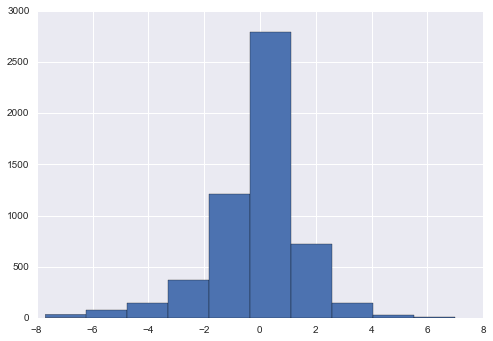

In [3]:
#Import KL Expression data provide by Kieran
fname_kl_data = os.path.normpath(base_dir + '\expression_data\kl_PKA_as_20160824\geneExpression.txt')
kl_PKA_data = pd.read_table(fname_kl_data, index_col = [0])

#Normalize by the total number of reads
fname_kl_metadata = os.path.normpath(base_dir + '\expression_data\kl_PKA_as_20160824' + os.sep + '20160824_KL_PKA_AS_SYC_SC_Control_metadata.xlsx')
kl_PKA_metadata = pd.read_excel(fname_kl_metadata)
kl_PKA_metadata.set_index('SampleName', inplace = 'True')
kl_PKA_data_summary = pd.DataFrame(kl_PKA_data.sum(axis = 'rows'),columns = ['Total Aligned Reads'])
kl_PKA_data_summary['Total Reads'] = kl_PKA_metadata['Total Reads']
kl_PKA_data_summary['Percent Aligned'] = kl_PKA_data_summary['Total Aligned Reads'] / kl_PKA_metadata['Total Reads']

kl_PKA_data_norm = pd.DataFrame(index = kl_PKA_data.index)
#normalize by total aligned reads, adding in a single pseudocount to avoid dividing by zero
for sample in kl_PKA_data.columns: 
    kl_PKA_data_norm[sample] = (kl_PKA_data[sample]+1)/kl_PKA_data_summary.loc[sample,'Total Aligned Reads']

#Average repeat columns
kl_PKA_data_norm['AS_minus']=kl_PKA_data_norm[['AS1_minus','AS2_minus']].mean(axis=1)  
kl_PKA_data_norm['AS_plus']=kl_PKA_data_norm[['AS1_plus','AS2_plus']].mean(axis=1)
kl_PKA_data_norm['AS_log_fold_change']=log(kl_PKA_data_norm['AS_plus']/kl_PKA_data_norm['AS_minus'])/log(2.0)
hist(kl_PKA_data_norm['AS_log_fold_change'])

#Convert Index in kl_PKA_data_norm to joined format. 
kl_PKA_data_norm.index
kl_PKA_data_norm_reindex = []
for gene in kl_PKA_data_norm.index:
    if gene[0:5]=='KLLA0':
        new_gene = gene.split('_')[0]+gene.split('_')[1]
    else: 
        new_gene = gene
    kl_PKA_data_norm_reindex.append(new_gene)
kl_PKA_data_norm_reindex_se = pd.Series(kl_PKA_data_norm_reindex)
kl_PKA_data_norm['standard orf names'] = kl_PKA_data_norm_reindex_se.values
kl_PKA_data_norm.set_index('standard orf names', inplace = True)



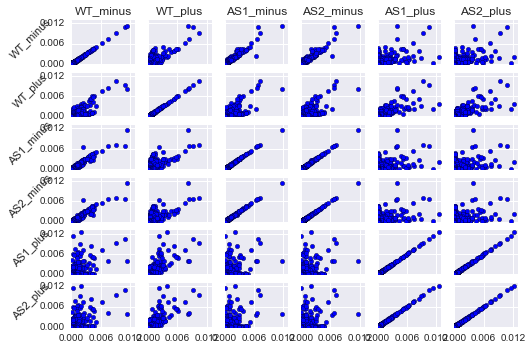

In [24]:
#All by all correlations for each condition
conditions = ['WT_minus','WT_plus','AS1_minus','AS2_minus','AS1_plus','AS2_plus']
fig, axarr = plt.subplots(len(conditions), len(conditions), sharex = True, sharey = True)
for jj in range(len(conditions)): 
    condition_data_J = kl_PKA_data_norm[conditions[jj]]
    for kk in range(len(conditions)):
        ax = axarr[jj,kk]
        condition_data_K = kl_PKA_data_norm[conditions[kk]]
        ax.scatter(condition_data_K, condition_data_J)
        ax.set_xlim(0.0, 0.013)
        ax.set_xticks([0.0,0.006,0.012])
        ax.set_ylim(0.0, 0.013)
        ax.set_yticks([0.0,0.006,0.012])
        if kk == 0:
            ax.set_ylabel(conditions[jj], rotation = 45)
        if jj == 0:
            ax.set_title(conditions[kk])

        

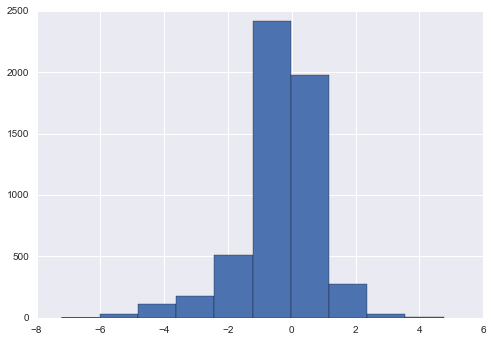

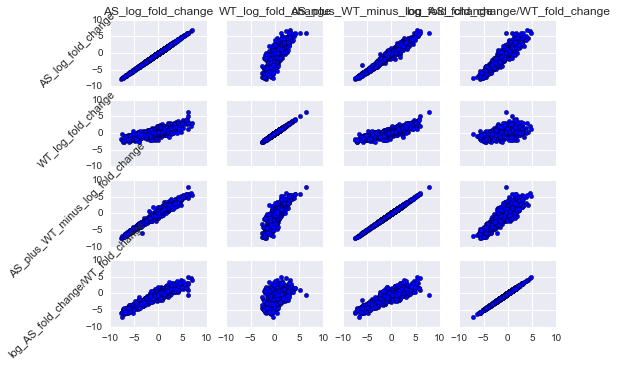

In [73]:
#Make WT+/WT- Ratio and AS+/WT- ratio.  Do correlation of all three ratios. 
kl_PKA_data_norm['WT_log_fold_change'] =log(kl_PKA_data_norm['WT_plus']/kl_PKA_data_norm['WT_minus'])/log(2.0)
kl_PKA_data_norm['AS_plus_WT_minus_log_fold_change'] = log(kl_PKA_data_norm['AS_plus']/kl_PKA_data_norm['WT_minus'])/log(2.0)
kl_PKA_data_norm['log_AS_fold_change/WT_fold_change']= kl_PKA_data_norm['AS_log_fold_change']-kl_PKA_data_norm['WT_log_fold_change']

fig2, ax2 = plt.subplots()
ax2.hist(kl_PKA_data_norm['log_AS_fold_change/WT_fold_change'])

conditions = ['AS_log_fold_change','WT_log_fold_change', 'AS_plus_WT_minus_log_fold_change','log_AS_fold_change/WT_fold_change']
fig, axarr = plt.subplots(len(conditions), len(conditions), sharex = True, sharey = True)
for jj in range(len(conditions)): 
    condition_data_J = kl_PKA_data_norm[conditions[jj]]
    for kk in range(len(conditions)):
        ax = axarr[jj,kk]
        condition_data_K = kl_PKA_data_norm[conditions[kk]]
        ax.scatter(condition_data_K, condition_data_J)
#         ax.set_xlim(0.0, 0.013)
#         ax.set_xticks([0.0,0.006,0.012])
#         ax.set_ylim(0.0, 0.013)
#         ax.set_yticks([0.0,0.006,0.012])
        if kk == 0:
            ax.set_ylabel(conditions[jj], rotation = 45)
        if jj == 0:
            ax.set_title(conditions[kk])
            

In [24]:
set(kl_PKA_data_norm['WT_log_fold_change'].sort_values()[:20].index) & set(unmatched_ortholog_foldchange.index)
# top_WT_foldchange = kl_PKA_data_norm['WT_log_fold_change'].sort_values()[:20]
# for gene_exp in top_WT_foldchange.iteritems():
#     gene = gene_exp[0]
#     try: 
#         print gene + '\t' + str(gene_exp[1])+ '\t' + annotation_lookup[gene]
#     except KeyError: 
#         print gene + '\t' + str(gene_exp[1])+ '\t' + 'no annotation'


{'KLLA0E23695g'}

In [4]:
#Make set of unmatched K.Lactis orthologs and count them up
orth_dict = io_library.read_orth_lookup_table('Kluyveromyces lactis', 'Saccharomyces cerevisiae')

kl_unmatched_orthologs = []
for kl_gene, value in orth_dict.iteritems():
    if value == ['NONE']:
        kl_unmatched_orthologs.append(kl_gene)

#Find unaligned orthologs
unmatched_orthologs_not_aligned = []
unmatched_ortholog_expression = {}
#can add conditions if we want to keep more data for future analysis
conditions = ['log_AS_fold_change/WT_fold_change']#['AS_log_fold_change','AS_plus','AS_minus']
for kl_gene in kl_unmatched_orthologs: 
    try:
        unmatched_ortholog_expression[kl_gene] = list(kl_PKA_data_norm.loc[kl_gene,conditions])
    except KeyError:
        unmatched_orthologs_not_aligned.append(kl_gene)

unmatched_ortholog_expression_df = pd.DataFrame.from_dict(unmatched_ortholog_expression, orient  = 'index') #, columns = 
unmatched_ortholog_expression_df.columns = conditions

#See if there are any high/low expressed genes in the unmatched ortholog set
unmatched_ortholog_foldchange = unmatched_ortholog_expression_df[conditions[0]]
hist(unmatched_ortholog_foldchange)

N = 4
print 'there are ' + str(len(kl_unmatched_orthologs)) + \
    ' K.Lactis orthologs that are unmatched in S.Cerevisiae\n Of those, ' + \
    str(len(unmatched_orthologs_not_aligned)) + ' were not considered in the alignment.\n' +\
    'Of those considered in the alignment, ' + \
    str(len(unmatched_ortholog_foldchange[unmatched_ortholog_foldchange<-log(N)/log(2)])) + ' were repressed and ' + \
    str(len(unmatched_ortholog_foldchange[unmatched_ortholog_foldchange>log(N/log(2))])) + ' were induced greater than ' + str(N) + '-fold'

    
#Print out table with annotations for top unmatched orthologs

species = 'Kluyveromyces lactis'
base_dir = 'C:\Users\Ben\Documents\GitHub\expression_broad_data\\'
species_tab_file = 'expression_data\YGOB_genome_files\Klactis_genome.tab'
annotation_lookup = io_library.load_YGOB_annotations(species, base_dir, species_tab_file)

top_unmatched_repressed = unmatched_ortholog_foldchange[unmatched_ortholog_foldchange<-log(N)/log(2)].sort_values()
for gene_exp in top_unmatched_repressed.iteritems():
    gene = gene_exp[0]
    print gene + '\t' + str(gene_exp[1])+ '\t' + annotation_lookup[gene]


top_unmatched_activated = unmatched_ortholog_foldchange[unmatched_ortholog_foldchange>log(N)/log(2)].sort_values(ascending = False)
for gene_exp in top_unmatched_activated.iteritems():
    gene = gene_exp[0]
    print gene + '\t' + str(gene_exp[1])+ '\t' + annotation_lookup[gene]


ValueError: Length mismatch: Expected axis has 0 elements, new values have 1 elements

In [76]:
#Plot Scatter plot of ortholog fold change (with and without pairing most similar ortholog)

#load raw data for NMPP1 experiments from Capaldi Paper
desired_conditions = [('100uM NMPP1','GSM1423542')]
data_dir = base_dir + '\expression_data\GSE58992_Capaldi_2014\\'
GEO_accession = 'GSE58992'
capaldi_SC_PKA_data = io_library.parse_data_series_matrix_SC(desired_conditions, data_dir, GEO_accession)

#Load PKA inhibition data for O'shea
desired_conditions = [('No 1-NMPP1 0 min','GSM812516'), ('3uM 1-NMPP1 40 min','GSM812520')]   
data_dir = base_dir + '\expression_data\GSE32703_NMPP1_SC\\' 
GEO_accession = 'GSE32703'
oshea_SC_PKA_data = io_library.parse_data_series_matrix_SC(desired_conditions, data_dir, GEO_accession)
oshea_SC_PKA_data['PKA inhibition 3uM 1NMPP1'] = oshea_SC_PKA_data.iloc[:,1].sub(oshea_SC_PKA_data.iloc[:,0])

#Load Kieran's PKA inhibition data
fname_mace_SC_PKA_data = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq\SC_1NMPP1_From_Kieran.tsv')
mace_SC_PKA_data = pd.read_table(fname_mace_SC_PKA_data, sep = ' ', index_col = [0])
mace_SC_PKA_data.columns = ['WT_minus','AS_plus','WT_plus']

#Normalize by the total number of reads
mace_SC_PKA_data_total_reads = mace_SC_PKA_data.sum(axis = 'rows')
mace_SC_PKA_data_norm = pd.DataFrame(index = mace_SC_PKA_data.index)
#normalize by total aligned reads, adding in a single pseudocount to avoid dividing by zero
for sample in mace_SC_PKA_data.columns: 
    mace_SC_PKA_data_norm[sample] = (mace_SC_PKA_data[sample]+1)/mace_SC_PKA_data_total_reads[sample]

#Make Fold change columns
mace_SC_PKA_data_norm['WT_log_fold_change']=log(mace_SC_PKA_data_norm['WT_plus']/mace_SC_PKA_data_norm['WT_minus'])/log(2.0)
mace_SC_PKA_data_norm['AS_plus_WT_minus_log_fold_change'] = log(mace_SC_PKA_data_norm['AS_plus']/mace_SC_PKA_data_norm['WT_minus'])/log(2.0)

#hist(mace_SC_PKA_data_norm['AS_plus_WT_minus_log_fold_change'])
#hist(mace_SC_PKA_data_norm['WT_log_fold_change'])

# conditions = ['WT_log_fold_change', 'AS_plus_WT_minus_log_fold_change']
# fig, axarr = plt.subplots(len(conditions), len(conditions), sharex = True, sharey = True)
# for jj in range(len(conditions)): 
#     condition_data_J = mace_SC_PKA_data_norm[conditions[jj]]
#     for kk in range(len(conditions)):
#         ax = axarr[jj,kk]
#         condition_data_K = mace_SC_PKA_data_norm[conditions[kk]]
#         ax.scatter(condition_data_K, condition_data_J)
# #         ax.set_xlim(0.0, 0.013)
# #         ax.set_xticks([0.0,0.006,0.012])
# #         ax.set_ylim(0.0, 0.013)
# #         ax.set_yticks([0.0,0.006,0.012])
#         if kk == 0:
#             ax.set_ylabel(conditions[jj], rotation = 45)
#         if jj == 0:
#             ax.set_title(conditions[kk])


#Load Susan's TPK-AS NMPP1 data
fname_SYC_SC_PKA_plus = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq_SYC\NMPP_abundance_paired.tsv')
SYC_SC_PKA_plus = pd.read_table(fname_SYC_SC_PKA_plus, sep = '\t', index_col = [0])
#SYC_SC_PKA_plus.columns are: ['length','eff_length','est_counts','TPM']
SYC_SC_PKA_plus_total_reads = SYC_SC_PKA_plus['est_counts'].sum(axis = 'rows')
SYC_SC_PKA_plus_norm = pd.DataFrame(index = SYC_SC_PKA_plus.index)
SYC_SC_PKA_plus_norm['AS_plus'] = (SYC_SC_PKA_plus['est_counts']+1)/SYC_SC_PKA_plus_total_reads


fname_SYC_SC_PKA_minus = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq_SYC\\none_abundance_paired.tsv')
SYC_SC_PKA_minus = pd.read_table(fname_SYC_SC_PKA_minus, sep = '\t', index_col = [0])
#SYC_SC_PKA_minus.columns are: ['length','eff_length','est_counts','TPM']
SYC_SC_PKA_minus_total_reads = SYC_SC_PKA_minus['est_counts'].sum(axis = 'rows')
SYC_SC_PKA_minus_norm = pd.DataFrame(index = SYC_SC_PKA_minus.index)
SYC_SC_PKA_minus_norm['AS_minus'] = (SYC_SC_PKA_minus['est_counts']+1)/SYC_SC_PKA_minus_total_reads

SYC_SC_PKA_data_norm = pd.concat([SYC_SC_PKA_plus_norm, SYC_SC_PKA_minus_norm], axis = 1 )
SYC_SC_PKA_data_norm['AS_log_fold_change'] = log(SYC_SC_PKA_data_norm['AS_plus']/SYC_SC_PKA_data_norm['AS_minus'])/log(2.0)

#Load Broach NMPP1 data

#Merge SCer PKA data
SC_PKA_data_norm = pd.concat([SYC_SC_PKA_data_norm['AS_log_fold_change'], mace_SC_PKA_data_norm['AS_plus_WT_minus_log_fold_change'],oshea_SC_PKA_data['PKA inhibition 3uM 1NMPP1'], capaldi_SC_PKA_data['100uM NMPP1'] ],axis = 1)
SC_PKA_data_norm.columns = ['Chen','Pincus','Oshea','Capaldi']

# conditions = ['Chen','Pincus','Oshea','Capaldi']
# fig, axarr = plt.subplots(len(conditions), len(conditions), sharex = True, sharey = True)
# for jj in range(len(conditions)): 
#     condition_data_J = SC_PKA_data_norm[conditions[jj]]
#     for kk in range(len(conditions)):
#         ax = axarr[jj,kk]
#         condition_data_K = SC_PKA_data_norm[conditions[kk]]
#         ax.scatter(condition_data_K, condition_data_J)
# #         ax.set_xlim(0.0, 0.013)
# #         ax.set_xticks([0.0,0.006,0.012])
# #         ax.set_ylim(0.0, 0.013)
# #         ax.set_yticks([0.0,0.006,0.012])
#         if kk == 0:
#             ax.set_ylabel(conditions[jj], rotation = 45)
#         if jj == 0:
#             ax.set_title(conditions[kk])

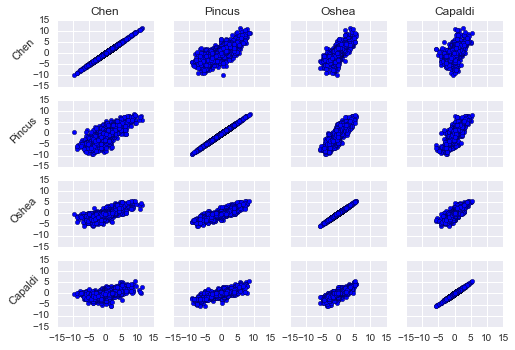

In [38]:
conditions = ['Chen','Pincus','Oshea','Capaldi']
fig, axarr = expression_plots.multi_scatter_plot(SC_PKA_data_norm, conditions)

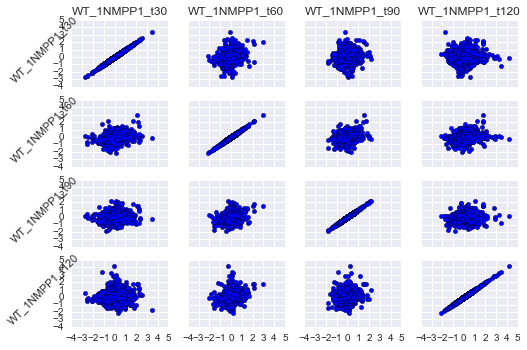

In [6]:
#Load NMPP1 only data
#Shokat Lab
fname_kung_SC_WT_NMPP1 = os.path.normpath(base_dir + '\expression_data\NMPP1_WT_Timecourse\\07170DataSet4.txt')
kung_SC_WT_NMPP1 = pd.read_table(fname_kung_SC_WT_NMPP1, sep = '\t', index_col = [0])
conditions_orig = kung_SC_WT_NMPP1.columns[1:]
conditions=  []
for condition in conditions_orig: 
    time = condition.split()[1]
    new_condition = 'WT_1NMPP1_t'+time
    conditions.append(new_condition)
    kung_SC_WT_NMPP1[new_condition]=log(kung_SC_WT_NMPP1[condition])/log(2)

#xlim = [-2, 7]
#xticks = [0.0,0.006,0.012]
#ylim = [-2, 7]
#yticks([0.0,0.006,0.012])
fig, axarr = expression_plots.multi_scatter_plot(kung_SC_WT_NMPP1, conditions) # xlim = xlim, ylim = ylim)


#Broach

#Merge NMPP1 only data with PKA data

#Scatter Plot

In [10]:
print len(kl_unmatched_orthologs)
print sum([ortholog[0:4] == 'KLLA' for ortholog in kl_unmatched_orthologs])
kl_unmatched_orthologs

689
612


['KLLA0B04466g',
 'KLLA0D11286g',
 'KLLA0D03333g',
 'KLLA0F01815g',
 'KLLA0C00330g',
 'KLLA0A00176g',
 'KLLA0D00187g',
 'KLLA0B10395g',
 'KLLA0A05511g',
 'KLLA0E14433g',
 'KLLA0E09703g',
 'KLLA0E22177g',
 'Klac_4.trna11L',
 'KLLA0D20031g',
 'KLLA0F22198g',
 'KLLA0D04181g',
 'KLLA0B14817g',
 'KLLA0E00397g',
 'KLLA0F03861g',
 'Klac_3.trna8A',
 'KLLA0A04125g',
 'KLLA0D00143g',
 'KLLA0A11110g',
 'KLLA0F00286g',
 'KLLA0E17293g',
 'Klac_1.trna14R',
 'KLLA0E04599g',
 'KLLA0E02223g',
 'KLLA0F09405g',
 'KLLA0D15378g',
 'KLLA0C06699g',
 'Klac_3.trna5S',
 'Klac_1.trna9K',
 'KLLA0C04125g',
 'KLLA0F09559g',
 'KLLA0F00264g',
 'KLLA0D18964g',
 'KLLA0F23441g',
 'KLLA0C19338g',
 'Klac_6.trna28H',
 'KLLA0C08437g',
 'KLLA0E10935g',
 'KLLA0B14729g',
 'KLLA0D03740g',
 'KLLA0E11309g',
 'Klac_5.trna11D',
 'KLLA0E04005g',
 'KLLA0D00374g',
 'KLLA0E24003g',
 'KLLA0C00190g',
 'KLLA0B14839g',
 'KLLA0A04609g',
 'KLLA0F00154g',
 'KLLA0C00264g',
 'KLLA0B06259g',
 'KLLA0B10626g',
 'KLLA0D04686g',
 'KLLA0E11133g',
 'K

BPAC                     NaN
GEM_artificialTF         NaN
Q0010               1.400157
Q0017               1.400157
Q0032               1.400157
Q0045              -0.184806
Q0050               0.400157
Q0055               0.592802
Q0060               0.400157
Q0065               1.400157
Q0070               1.400157
Q0075              -0.184806
Q0080               1.400157
Q0085               0.400157
Q0092               1.400157
Q0105              -0.599843
Q0110               1.400157
Q0115               1.400157
Q0120               1.400157
Q0130               0.177765
Q0140               0.400157
Q0142               1.400157
Q0143               1.400157
Q0144               1.400157
Q0160               1.400157
Q0182               1.400157
Q0250               0.400157
Q0255               0.400157
Q0275               0.985119
Q0297               0.400157
                      ...   
YPR178W             0.581935
YPR179C             0.252727
YPR180W             0.645367
YPR181C       

In [81]:
#Turn into a dictionary
species2 = 'Kluyveromyces lactis'
species1 = 'Saccharomyces cerevisiae' 
orth_lookup_SCer_KLac_dict = io_library.read_orth_lookup_table(species1, species2)

#for each row in the SC PKA inhibition data add a tuple with (SC Gene name, SC Expression, KL Gene Name, KL Expression)
orth_expression = []
SC_data = SC_PKA_data_norm['Pincus']
for line in SC_data.iteritems(): 
    SCer_gene = line[0]
    SCer_exp = line[1]
    try:
        kl_orths = orth_lookup_SCer_KLac_dict[SCer_gene]
        if kl_orths[0] == 'NONE':
            KLac_gene = None
            KLac_exp = None
        else:
            for KLac_gene in kl_orths:
                try: 
                    #KLac_exp = kl_PKA_data_norm['AS_log_fold_change'][KLac_gene]
                    KLac_exp = kl_PKA_data_norm['log_AS_fold_change/WT_fold_change'][KLac_gene]
                    
                except KeyError: 
                    KLac_exp = None
                orth_expression.append((SCer_gene, SCer_exp, KLac_gene, KLac_exp))
                
    except KeyError:
        KLac_gene = None
        KLac_exp = None
        orth_expression.append((SCer_gene, SCer_exp, KLac_gene, KLac_exp))

orth_expression_df = pd.DataFrame(orth_expression, columns = ['SCer_gene','SCer_exp','KLac_gene','KLac_exp'])
#output is a list of ression values for each ortholog

#After generating a dataframe with orthologs and expression values for each SC Gene, make plotting vectors: 

# Iterate through each SC Gene
# If there is an orthololog and there is an expression value
# If there's just one value, put that in the x column
# If there's more than one value put that in he 
    
#Convert KL_orth to joined string


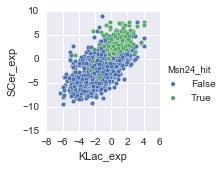

In [93]:
fname = "gasch_fig7_all_conditions.txt"
gasch_Msn24_top_hits = io_library.read_gasch_data([conditions_Msn24[0]],fname) #only need indices so using dummy variable. 
orth_expression_df['orfs']=orth_expression_df['SCer_gene']
top_hit_check = lambda orf: orf in set(gasch_Msn24_top_hits.index)
orth_expression_df['Msn24_hit'] = orth_expression_df['orfs'].apply(top_hit_check)

sns.pairplot(orth_expression_df, x_vars = ['KLac_exp'], y_vars = 'SCer_exp', hue = 'Msn24_hit')

# fig, ax = plt.subplots()
# xx = orth_expression_df['KLac_exp'][orth_expression_df['KLac_exp'].notnull()]
# yy = orth_expression_df['SCer_exp'][orth_expression_df['KLac_exp'].notnull()]
# ax.scatter(xx,yy)
# ax.set_xlabel('KLac Log Fold Change w/ 1NMPP1')
# ax.set_ylabel('SCer Log Fold Change w/ 1NMPP1 (Pincus)')

,SCer_gene,SCer_exp,KLac_gene,KLac_exp,orfs,Msn24_hit,SCer name,SCer annotation,KLac annotation
2358,YGR150C,-0.062394,KLLA0E10803g,-5.120492,YGR150C,False,CCM1,Mitochondrial 15S rRNA-binding protein; requir...,similar to uniprot|P48237 Saccharomyces cerevi...
706,YCR087C-A,1.400157,KLLA0F10219g,-5.055932,YCR087C-A,False,NaN,Putative protein of unknown function; green fl...,similar to uniprot|P37263 Saccharomyces cerevi...
2380,YGR169C,-0.154109,KLLA0F14553g,-5.021740,YGR169C,False,PUS6,tRNA:pseudouridine synthase; catalyzes the con...,similar to uniprot|P53294 Saccharomyces cerevi...
2866,YIL066C,0.850659,KLLA0C07887g,-4.902884,YIL066C,False,RNR3,Minor isoform of large subunit of ribonucleoti...,highly similar to uniprot|P21524 Saccharomyces...
4323,YML074C,-1.404904,KLLA0B04664g,-4.806757,YML074C,False,FPR3,Nucleolar peptidyl-prolyl cis-trans isomerase ...,highly similar to uniprot|Q06205 Saccharomyces...
2313,YGR109C,-0.790365,KLLA0D15565g,-4.770366,YGR109C,False,CLB6,B-type cyclin involved in DNA replication duri...,similar to uniprot|P30283 Saccharomyces cerevi...
6068,YPR120C,-1.664222,KLLA0D15565g,-4.770366,YPR120C,False,CLB5,B-type cyclin involved in DNA replication duri...,similar to uniprot|P30283 Saccharomyces cerevi...
5699,YPL026C,-1.587645,KLLA0D12100g,-4.653867,YPL026C,False,SKS1,Putative serine/threonine protein kinase; invo...,similar to uniprot|Q12505 Saccharomyces cerevi...
1229,YDR247W,2.651440,KLLA0D12100g,-4.653867,YDR247W,False,VHS1,Cytoplasmic serine/threonine protein kinase; i...,similar to uniprot|Q12505 Saccharomyces cerevi...
516,YBR252W,-2.072400,KLLA0D15697g,-4.508322,YBR252W,False,DUT1,Deoxyuridine triphosphate diphosphatase (dUTPa...,"highly similar to YBR252W, uniprot|P33317 Sacc..."


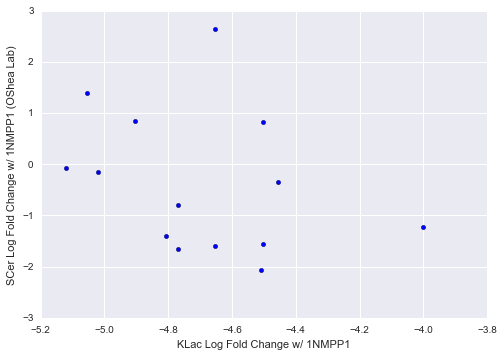

In [98]:
gene_subset = (set(xx[yy>-2.25].index) & set(xx[xx<-4.00].index))
fig, ax = plt.subplots()
xx = orth_expression_df['KLac_exp'][gene_subset]
yy = orth_expression_df['SCer_exp'][gene_subset]
ax.scatter(xx,yy)
ax.set_xlabel('KLac Log Fold Change w/ 1NMPP1')
ax.set_ylabel('SCer Log Fold Change w/ 1NMPP1 (OShea Lab)')

#Make list of SC Gene, KL Gene and their respective annotations. 
orth_expression_subset = orth_expression_df.loc[gene_subset,:]
orth_expression_subset.sort_values(by = 'KLac_exp', inplace = True)

SC_orfs_lookup, SC_genename_lookup, SC_features_lookup = io_library.read_SGD_features()

annotation_KL =[]
annotation_SC =[]
SCer_gene_name = []

for gene_exp in orth_expression_subset.iterrows():
    SCer_gene = gene_exp[1]['SCer_gene']
    KLac_gene = gene_exp[1]['KLac_gene']
    SCer_gene_name.append(SC_genename_lookup[SCer_gene])
    annotation_SC.append(SC_features_lookup[SCer_gene])
    annotation_KL.append(annotation_lookup[KLac_gene])


orth_expression_subset['SCer name'] = SCer_gene_name
orth_expression_subset['SCer annotation'] = annotation_SC
orth_expression_subset['KLac annotation'] = annotation_KL

orth_expression_subset

,SCer_gene,SCer_exp,KLac_gene,KLac_exp,orfs,Msn24_hit,SCer name,SCer annotation,KLac annotation
2358,YGR150C,-0.062394,KLLA0E10803g,-5.120492,YGR150C,False,CCM1,Mitochondrial 15S rRNA-binding protein; requir...,similar to uniprot|P48237 Saccharomyces cerevi...
706,YCR087C-A,1.400157,KLLA0F10219g,-5.055932,YCR087C-A,False,NaN,Putative protein of unknown function; green fl...,similar to uniprot|P37263 Saccharomyces cerevi...
2380,YGR169C,-0.154109,KLLA0F14553g,-5.021740,YGR169C,False,PUS6,tRNA:pseudouridine synthase; catalyzes the con...,similar to uniprot|P53294 Saccharomyces cerevi...
2866,YIL066C,0.850659,KLLA0C07887g,-4.902884,YIL066C,False,RNR3,Minor isoform of large subunit of ribonucleoti...,highly similar to uniprot|P21524 Saccharomyces...
4323,YML074C,-1.404904,KLLA0B04664g,-4.806757,YML074C,False,FPR3,Nucleolar peptidyl-prolyl cis-trans isomerase ...,highly similar to uniprot|Q06205 Saccharomyces...
2313,YGR109C,-0.790365,KLLA0D15565g,-4.770366,YGR109C,False,CLB6,B-type cyclin involved in DNA replication duri...,similar to uniprot|P30283 Saccharomyces cerevi...
6068,YPR120C,-1.664222,KLLA0D15565g,-4.770366,YPR120C,False,CLB5,B-type cyclin involved in DNA replication duri...,similar to uniprot|P30283 Saccharomyces cerevi...
5699,YPL026C,-1.587645,KLLA0D12100g,-4.653867,YPL026C,False,SKS1,Putative serine/threonine protein kinase; invo...,similar to uniprot|Q12505 Saccharomyces cerevi...
1229,YDR247W,2.651440,KLLA0D12100g,-4.653867,YDR247W,False,VHS1,Cytoplasmic serine/threonine protein kinase; i...,similar to uniprot|Q12505 Saccharomyces cerevi...
516,YBR252W,-2.072400,KLLA0D15697g,-4.508322,YBR252W,False,DUT1,Deoxyuridine triphosphate diphosphatase (dUTPa...,"highly similar to YBR252W, uniprot|P33317 Sacc..."


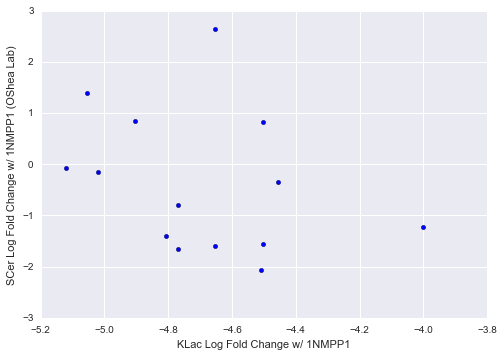

In [96]:
gene_subset = (set(xx[yy>-2.25].index) & set(xx[xx<-3.75].index))
fig, ax = plt.subplots()
xx = orth_expression_df['KLac_exp'][gene_subset]
yy = orth_expression_df['SCer_exp'][gene_subset]
ax.scatter(xx,yy)
ax.set_xlabel('KLac Log Fold Change w/ 1NMPP1')
ax.set_ylabel('SCer Log Fold Change w/ 1NMPP1 (OShea Lab)')

#Make list of SC Gene, KL Gene and their respective annotations. 
orth_expression_subset = orth_expression_df.loc[gene_subset,:]
orth_expression_subset.sort_values(by = 'KLac_exp', inplace = True)

SC_orfs_lookup, SC_genename_lookup, SC_features_lookup = io_library.read_SGD_features()

annotation_KL =[]
annotation_SC =[]
SCer_gene_name = []

for gene_exp in orth_expression_subset.iterrows():
    SCer_gene = gene_exp[1]['SCer_gene']
    KLac_gene = gene_exp[1]['KLac_gene']
    SCer_gene_name.append(SC_genename_lookup[SCer_gene])
    annotation_SC.append(SC_features_lookup[SCer_gene])
    annotation_KL.append(annotation_lookup[KLac_gene])


orth_expression_subset['SCer name'] = SCer_gene_name
orth_expression_subset['SCer annotation'] = annotation_SC
orth_expression_subset['KLac annotation'] = annotation_KL

orth_expression_subset


,SCer_gene,SCer_exp,KLac_gene,KLac_exp,orfs,Msn24_hit,SCer name,SCer annotation,KLac annotation
1577,YEL039C,5.873730,KLLA0F16929g,-2.182110,YEL039C,True,CYC7,"Cytochrome c isoform 2, expressed under hypoxi...",uniprot|P32556 Kluyveromyces lactis KLLA0F1692...
3457,YKL065W-A,4.591777,KLLA0F26818g,-2.152060,YKL065W-A,False,NaN,Putative protein of unknown function,no similarity\n
1006,YDR034W-B,5.906189,KLLA0F18766g,-1.732050,YDR034W-B,False,NaN,Predicted tail-anchored plasma membrane protei...,similar to uniprot|Q6Q5X2 Saccharomyces cerevi...
807,YDL085W,6.654495,KLLA0E21891g,-1.444425,YDL085W,False,NDE2,Mitochondrial external NADH dehydrogenase; cat...,similar to uniprot|P40215 Saccharomyces cerevi...
2665,YHR096C,5.697365,KLLA0D13310g,-1.252426,YHR096C,True,HXT5,Hexose transporter with moderate affinity for ...,uniprot|P18631 Kluyveromyces lactis RAG1 Low- ...
604,YCL048W-A,8.903983,KLLA0C00957g,-1.121867,YCL048W-A,False,NaN,Putative protein of unknown function; YCL048W-...,no similarity\n
5904,YPL230W,5.083683,KLLA0C16005g,-0.967399,YPL230W,True,USV1,Putative transcription factor containing a C2H...,some similarities with uniprot|Q12132 Saccharo...
426,YBR169C,4.576455,KLLA0E24597g,-0.822933,YBR169C,False,SSE2,Member of the heat shock protein 70 (HSP70) fa...,highly similar to uniprot|P32589 Saccharomyces...
1441,YDR453C,5.252737,KLLA0B01628g,-0.684243,YDR453C,True,TSA2,Stress inducible cytoplasmic thioredoxin perox...,highly similar to uniprot|P34760 Saccharomyces...
369,YBR117C,7.194422,KLLA0B09152g,-0.647922,YBR117C,True,TKL2,Transketolase; catalyzes conversion of xylulos...,uniprot|Q12630 Kluyveromyces lactis KLLA0B0915...


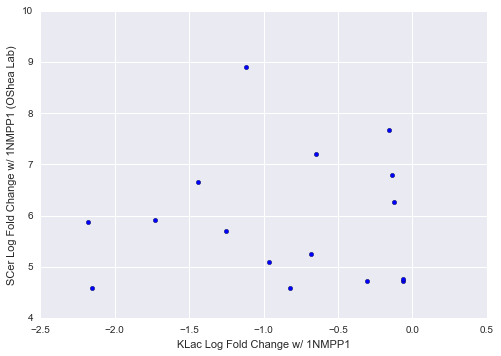

In [103]:
xx = orth_expression_df['KLac_exp'][orth_expression_df['KLac_exp'].notnull()]
yy = orth_expression_df['SCer_exp'][orth_expression_df['KLac_exp'].notnull()]
gene_subset = (set(xx[yy> 4.5].index) & set(xx[xx>-2.5].index) & set(xx[xx<.1].index))
fig, ax = plt.subplots()
xx_subset = orth_expression_df['KLac_exp'][gene_subset]
yy_subset = orth_expression_df['SCer_exp'][gene_subset]
ax.scatter(xx_subset,yy_subset)
ax.set_xlabel('KLac Log Fold Change w/ 1NMPP1')
ax.set_ylabel('SCer Log Fold Change w/ 1NMPP1 (OShea Lab)')

#Make list of SC Gene, KL Gene and their respective annotations. 
orth_expression_subset = orth_expression_df.loc[gene_subset,:]
orth_expression_subset.sort_values(by = 'KLac_exp', inplace = True)

SC_orfs_lookup, SC_genename_lookup, SC_features_lookup = io_library.read_SGD_features()

annotation_KL =[]
annotation_SC =[]
SCer_gene_name = []

for gene_exp in orth_expression_subset.iterrows():
    SCer_gene = gene_exp[1]['SCer_gene']
    KLac_gene = gene_exp[1]['KLac_gene']
    SCer_gene_name.append(SC_genename_lookup[SCer_gene])
    annotation_SC.append(SC_features_lookup[SCer_gene])
    annotation_KL.append(annotation_lookup[KLac_gene])


orth_expression_subset['SCer name'] = SCer_gene_name
orth_expression_subset['SCer annotation'] = annotation_SC
orth_expression_subset['KLac annotation'] = annotation_KL

orth_expression_subset

In [80]:
orth_expression_subset


,SCer_gene,SCer_exp,KLac_gene,KLac_exp,SCer annotation
3754,YLR325C,-1.867701,KLLA0C18216g,-5.330520,Ribosomal 60S subunit protein L38; homologous ...
4245,YMR230W,-2.018318,KLLA0B08173g,-5.119836,Protein component of the small (40S) ribosomal...
5141,YOR293W,-1.733054,KLLA0B08173g,-5.119836,Protein component of the small (40S) ribosomal...
4754,YOL039W,-0.940258,KLLA0F07865g,-5.114109,Ribosomal protein P2 alpha; a component of the...
1847,YGL076C,-1.381898,KLLA0D03410g,-5.071981,Ribosomal 60S subunit protein L7A; required fo...
3603,YLR167W,-1.257172,KLLA0D18304g,-4.981241,Fusion protein cleaved to yield ribosomal prot...
4834,YOL120C,-1.362537,KLLA0A07227g,-4.907055,Ribosomal 60S subunit protein L18A; intron of ...
2314,YHL015W,-0.889214,KLLA0F25542g,-4.896471,Protein component of the small (40S) ribosomal...
3058,YJR123W,-0.893479,KLLA0D10659g,-4.843927,Protein component of the small (40S) ribosomal...
4940,YOR078W,-1.614885,KLLA0A07623g,-4.767087,Component of small ribosomal subunit (SSU) pro...


In [66]:
conditions_Msn24[0]


'DBY7286 37degree heat - 20 min'

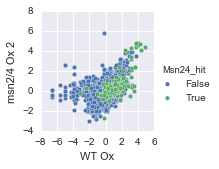

In [71]:
fname = "gasch_complete_dataset.txt"
conditions_Msn24 = ['DBY7286 37degree heat - 20 min', 'DBYmsn2-4- 37degree heat - 20 min',  'DBYmsn2/4 (real strain) + 37degrees (20 min)', 'DBY7286 + 0.3 mM H2O2 (20 min)','DBYmsn2msn4 (good strain) + 0.32 mM H2O2','DBYmsn2/4 (real strain) + 0.32 mM H2O2 (20 min)','Msn2 overexpression (repeat)','Msn4 overexpression']
gasch_Msn24_data = io_library.read_gasch_data(conditions_Msn24,fname)
gasch_Msn24_data.columns = ['WT HS','msn2/4 HS 1','msn2/4 HS2','WT Ox','msn2/4 Ox 1', 'msn2/4 Ox 2', 'msn2 Overexp', 'msn4 Overexp']
#fig, axarr = expression_plots.multi_scatter_plot(gasch_Msn24_data, conditions) # xlim = xlim, ylim = ylim)

#Get top Msn24 hits
fname = "gasch_fig7_all_conditions.txt"
gasch_Msn24_top_hits = io_library.read_gasch_data([conditions_Msn24[0]],fname) #only need indices so using dummy variable. 
gasch_Msn24_data['orfs']=gasch_Msn24_data.index
top_hit_check = lambda orf: orf in set(gasch_Msn24_top_hits.index)
gasch_Msn24_data['Msn24_hit'] = gasch_Msn24_data['orfs'].apply(top_hit_check)

conditions = ['WT HS','msn2/4 HS 1','msn2/4 HS2','WT Ox','msn2/4 Ox 1', 'msn2/4 Ox 2', 'msn2 Overexp', 'msn4 Overexp']
sns.pairplot(gasch_Msn24_data,x_vars=[conditions[3]],y_vars = [conditions[5]], hue="Msn24_hit")
#sns.pairplot(gasch_Msn24_data,x_vars=[conditions[0],conditions[3]],y_vars = [conditions[2],conditions[5],conditions[6]], hue="Msn24_hit")
#sns.lmplot(x=conditions[1], y=conditions[3], data=gasch_Msn24_data, hue="Msn24_hit")
           #col_wrap=2, ci=None, palette="muted", size=4,
           #scatter_kws={"s": 50, "alpha": 1})




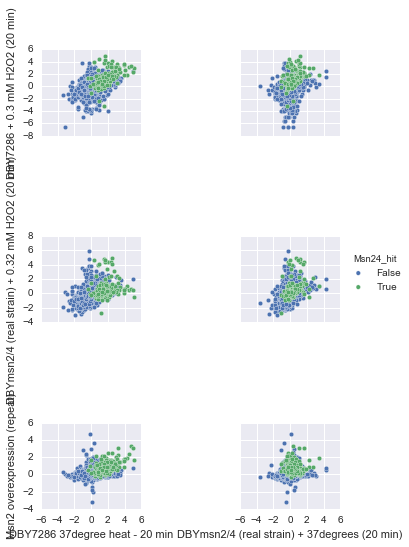

In [36]:
gasch_Msn24_top_hits.index

Index([u'YPL170W', u'YGR255C', u'YHR028C', u'YAL060W', u'YMR258C', u'YJR066W',
       u'YGR281W', u'YGR022C', u'YNL045W', u'YDL023C',
       ...
       u'YLR128W', u'YPR067W', u'YIL056W', u'YML005W', u'YPL225W', u'YOR338W',
       u'YOR360C', u'YNL234W', u'YGR282C', u'YDL038C'],
      dtype='object', length=182)